# PROJEKT ZALICZENIOWY 
# PORÓWNANIE MODELI KLASYFIKACYJNYCH NA PRZYKŁADZIE KLASYFIKACJI ZIAREN KAW DO SEGMENTU SPECIALITY

Autor: Andrzej Drożdż

## 1. OMÓWIENIE ZESTAWU DANYCH I ZAŁOŻEŃ PROJEKTU

### 1.1.  OMÓWIENIE ZESTAWU DANYCH

Projekt został oparty o zestaw danych "Coffee Quality with Locations of Origin", który został opublikowany na platformie Keggle przez użytkownika RealDealAdamP.
(link do źródła: https://www.kaggle.com/datasets/adampq/coffee-quality-with-locations-of-origin/data)

Dane pochodzą z internetowej bazy danych  "Coffee Quality Institute", istututu który zrzesza miłośników oraz specjalistów z branży kawowej pochodzących z różnych rejonów świata. Zbiór danych zawiera informacje dotyczące pochodzenia ziaren kawy, produkcji i przetwarzania ziaern kawy oraz oceny sensorycznej kawy, która powastał z próbki danej partii towaru.

Zestaw danych zawiera atrybuty:
 REC_ID - id rekordu w bazie danych
 Species  - gatunek kawy 
 Continent.of.Origin - kontynent pochodzenia
 Country.of.Origin - kraj pochodzenia
 Harvest.Year - rok zbioru
 Expiration - data ważności kawy
 Variety  - odmiana kawowca z którego pochodzą ziarna
 Color - kolor surowych zaren kawy
 Processing.Method - opisuje metodę stosowaną do przetwarzania ziaren kawy po zbiorze
 Aroma - zapach (skala punktowa 1-10)
 Flavor - smak (skala punktowa 1-10)
 Aftertaste - posmak (skala punktowa 1-10)
 Acidity - kwasowość (skala punktowa 1-10)
 Body - treść: Odnosi się do gęstości lub lepkości kawy w ustach (skala punktowa 1-10)
 Balance - balans: Odnosi się do tego, jak dobrze współpracują ze sobą różne składniki smakowe kawy (skala punktowa 1-10)
 Uniformity - jednorodność: odnosi się do konsystencji kawy w kolejnych filiżankach (skala punktowa 1-10)
 Clean.Cup - odnosi się do kawy wolnej od jakichkolwiek nieprzyjemnych posmaków i wad, takich jak kwaśność, stęchlizna lub    nieświeżość (skala punktowa 1-10)
 Sweetness - słodycz: odnosi się do palety słodyczy oferowanej przez smak (skala punktowa 1-10)
 Moisture  - wilgotność (%)
 Quakers - Wskazuje na obecność ziaren, które są niedojrzałe lub wadliwe i nie palą się prawidłowo
 Category.One.Defects - wada pierwszej kategorii: odnosi się do całkowitej liczby wad pierwszego stopnia
 Category.Two.Defects - wada drugiej kategorii: odnosi się do całkowitej liczby wad drugiego stopnia
 
Miary sensoryczne (w skali punktowej 1-10) służą do oceny czy dana partia kawy może być przypisana do segmentu Speciality.
Zasady oceny kawy wg. Speciality Coffee Association znajdują się pod linkiem:
https://www.scith.coffee/wp-content/uploads/2021/03/SCA-Protocols-_-Best-Practices.pdf

Oceniana kawa przez Q-gradera, może otrzymać maksymalnie 100 pkt. Może być zaliczona do segmentu jeżli otrzyma minimum 80 pkt. oraz nie posiada żadnego defektu pierwszego stopnia oraz nie więcej niż 5 defektów drugiego stopnia.

W podanym zestawie danych brakuje poniższych atrybutów aby można było dokonąć klasyfikacji ziaren kawy do segmentu speciality:
 Overall - jest to ocena ogólna wrażeń smakowych dokonana przez Q-gradera. Aby wypełnić te dane postanowiłem wtawić do tej kolumny średnią z istniejących kolumn sensorycznych.
 Defects - jest to atrybut mówiący o jakimś elemencie psującym smak kawy. Ten atrybut jest wyceniany na 2 lub 4 punkty i jest odejmowany od sumy wszystkich punktów. Po przeanalizowaniu różnych forów internetowych postanowiłem wykorzystać wartości w kolumnach Moisture i Quakers jako warunki do wstawienia odpowiednich waartości do kolumny defects.
 
W kolumnie Speciality, ziarnom kawy znajdującym się w zbiorze danych przypisałem etykiety 0 jeśli nie spełniły warunków i 1 jeśli spełniły warunki do przypisania do segmentu speciality. 



### 1.2.  ZAŁOŻENIA DO PROJEKTU

W projekcie wykorzystałem bibliotekę scikit-learn do tworzenia klasyfikacyjnych modeli uczenia maszynowewgo nadzorowanego: KNN, Drzewa decyzyjnego i regresji logistycznej oraz sprawdziłem ich skuteczność przy pomocy miar klasyfikacji. 

# 2. EDA

### 2.1. Import potrzebnych bibliotek, pobranie potrzebnych danych oraz przyjrzenie się zbiorowi danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
data = pd.read_csv('Coffee_Qlty.csv', index_col='REC_ID')

In [3]:
data.head()

,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
REC_ID,,,,,,,,,,,,,,,,,,,,,
0,Arabica,Africa,Ethiopia,2014.0,04/03/16,NaN,Green,Washed / Wet,8.67,8.83,...,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0
1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.75,8.67,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
2,Arabica,North America,Guatemala,NaN,05/31/11,Bourbon,NaN,NaN,8.42,8.50,...,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0
3,Arabica,Africa,Ethiopia,2014.0,03/25/16,NaN,Green,Natural / Dry,8.17,8.58,...,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2
4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.25,8.50,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1338
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Continent.of.Origin   1338 non-null   object 
 2   Country.of.Origin     1338 non-null   object 
 3   Harvest.Year          1279 non-null   float64
 4   Expiration            1339 non-null   object 
 5   Variety               1113 non-null   object 
 6   Color                 1121 non-null   object 
 7   Processing.Method     1169 non-null   object 
 8   Aroma                 1339 non-null   float64
 9   Flavor                1339 non-null   float64
 10  Aftertaste            1339 non-null   float64
 11  Acidity               1339 non-null   float64
 12  Body                  1339 non-null   float64
 13  Balance               1339 non-null   float64
 14  Uniformity            1339 non-null   float64
 15  Clean.Cup            

In [5]:
data.isna().sum()

Species                   0
Continent.of.Origin       1
Country.of.Origin         1
Harvest.Year             60
Expiration                0
Variety                 226
Color                   218
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Quakers                   0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

In [6]:
data.describe()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
count,1279.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,2013.567631,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,0.088379,0.173264,0.479462,3.556385
std,1.808496,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.048287,0.831824,2.549683,5.312541
min,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000,0.000000
50%,2013.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,0.000000,2.000000
75%,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,0.000000,4.000000
max,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,11.000000,63.000000,55.000000


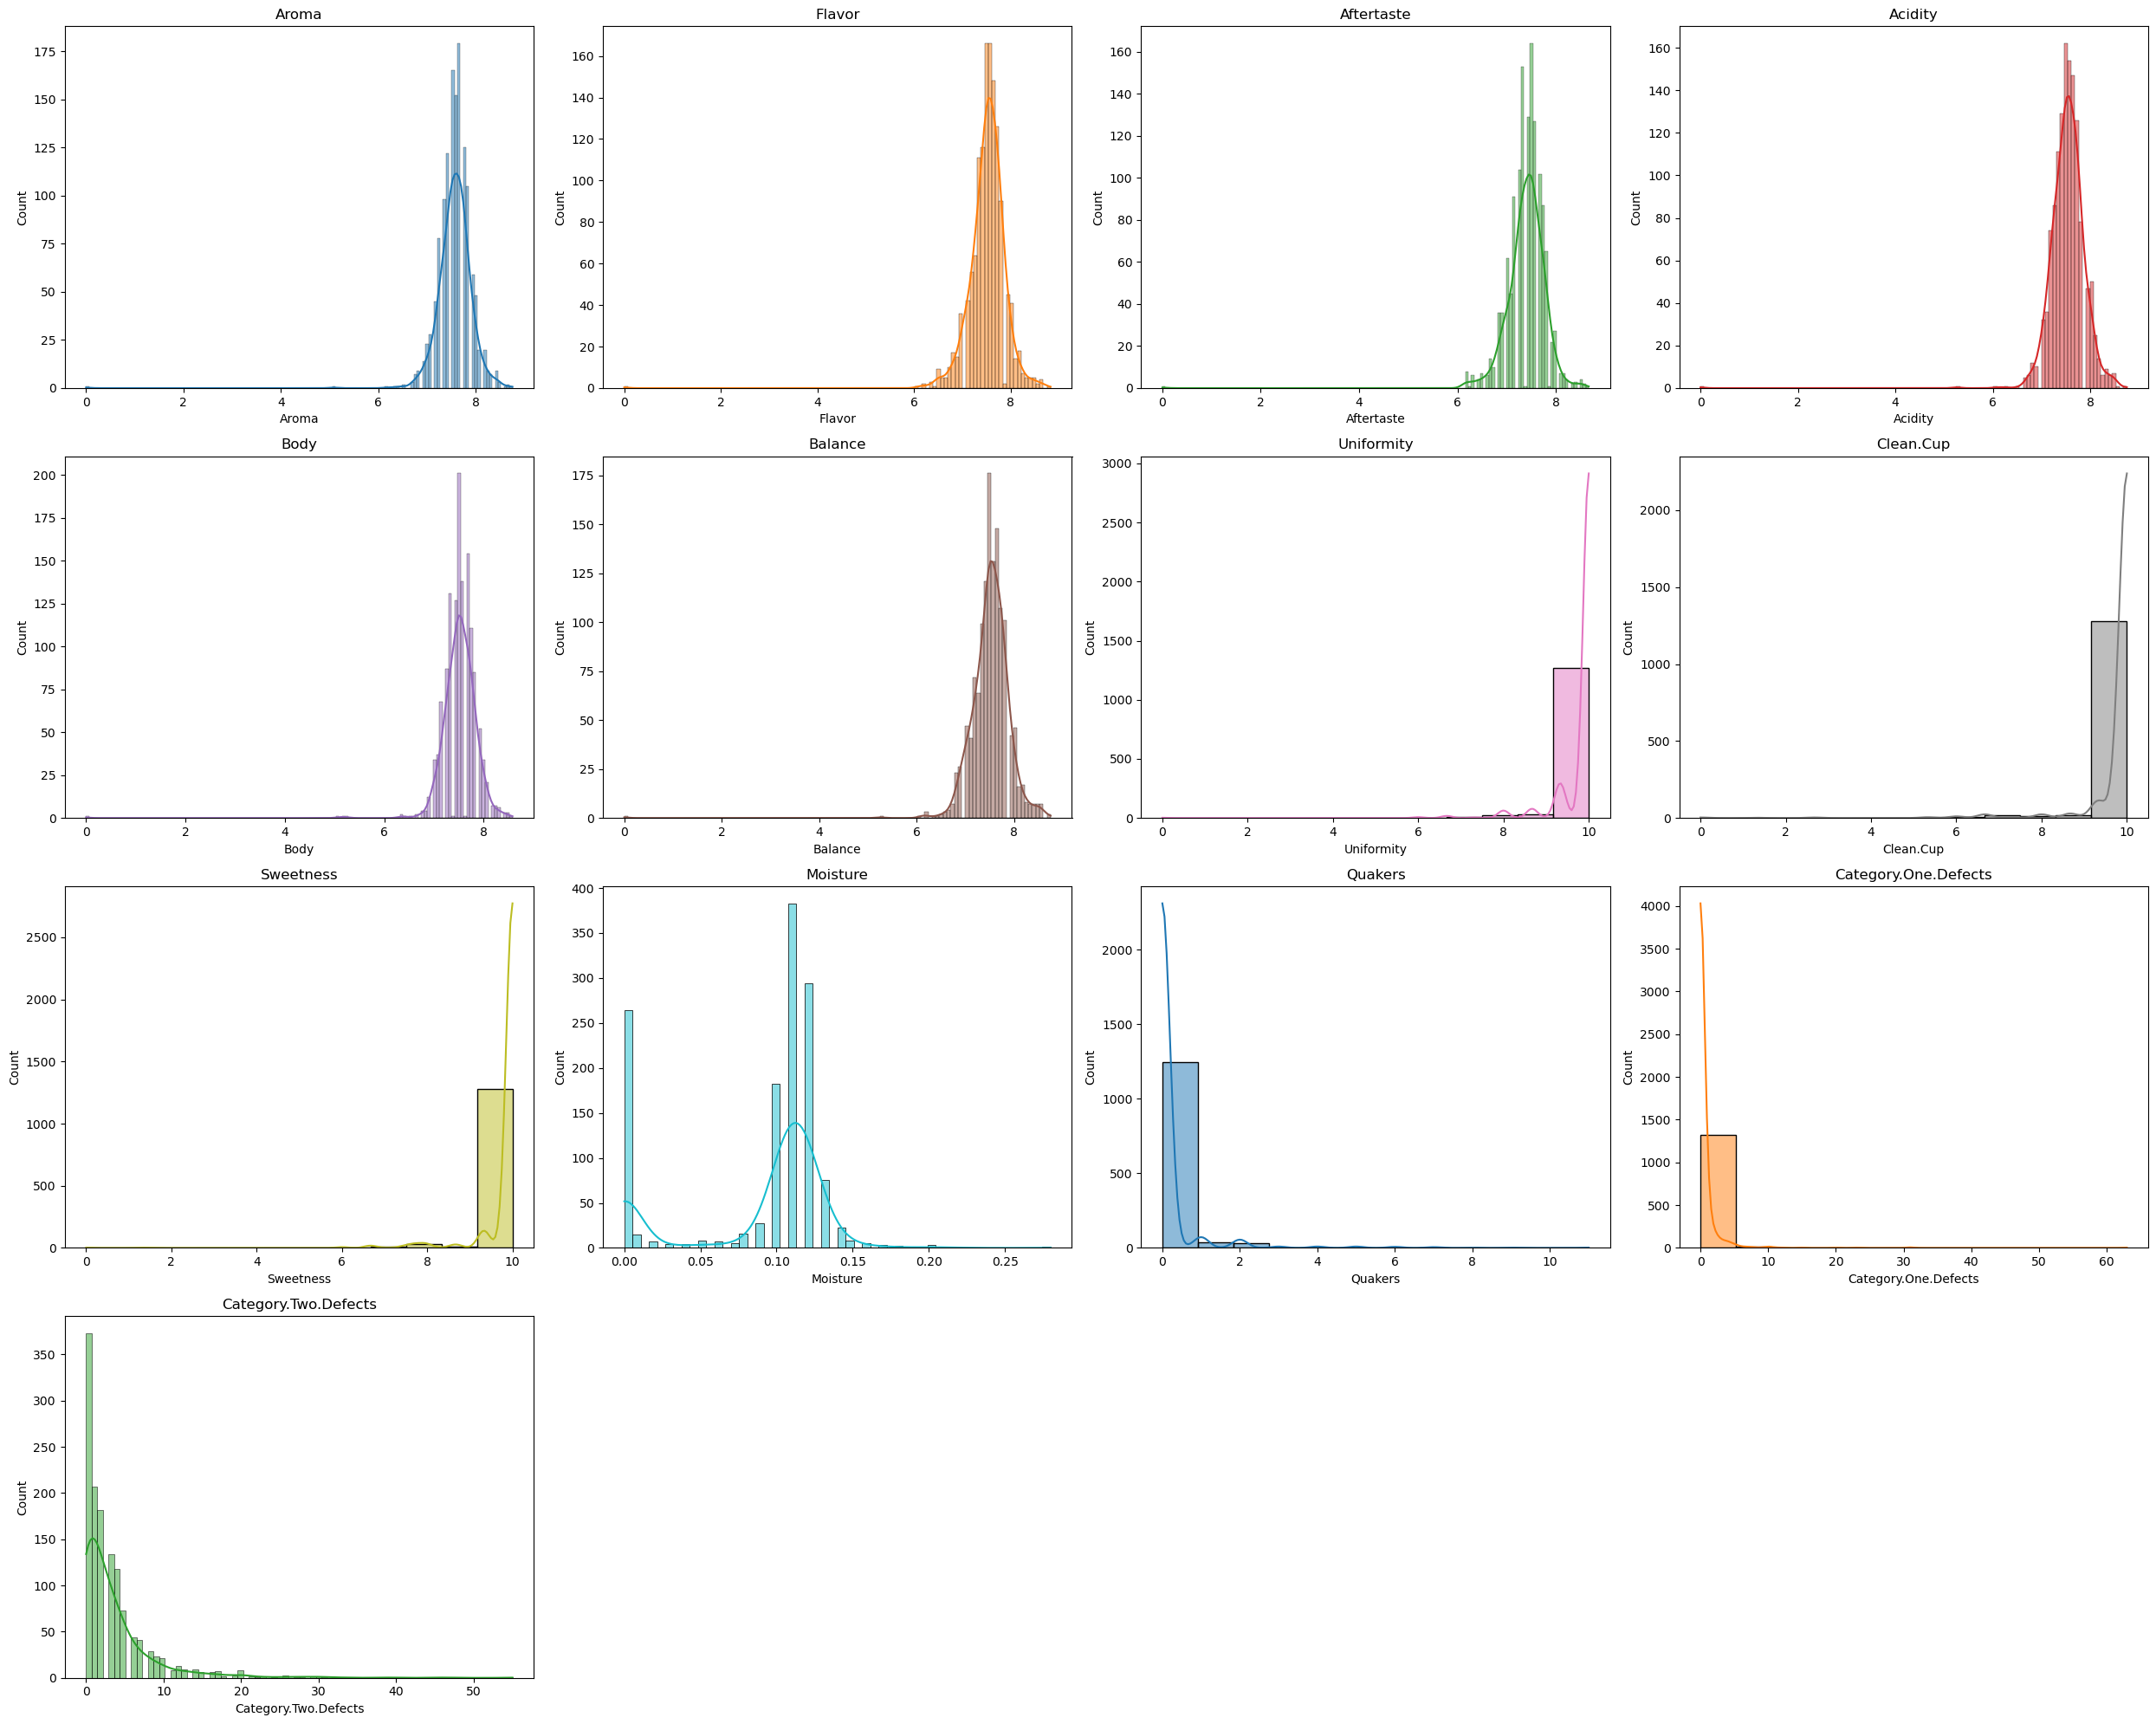

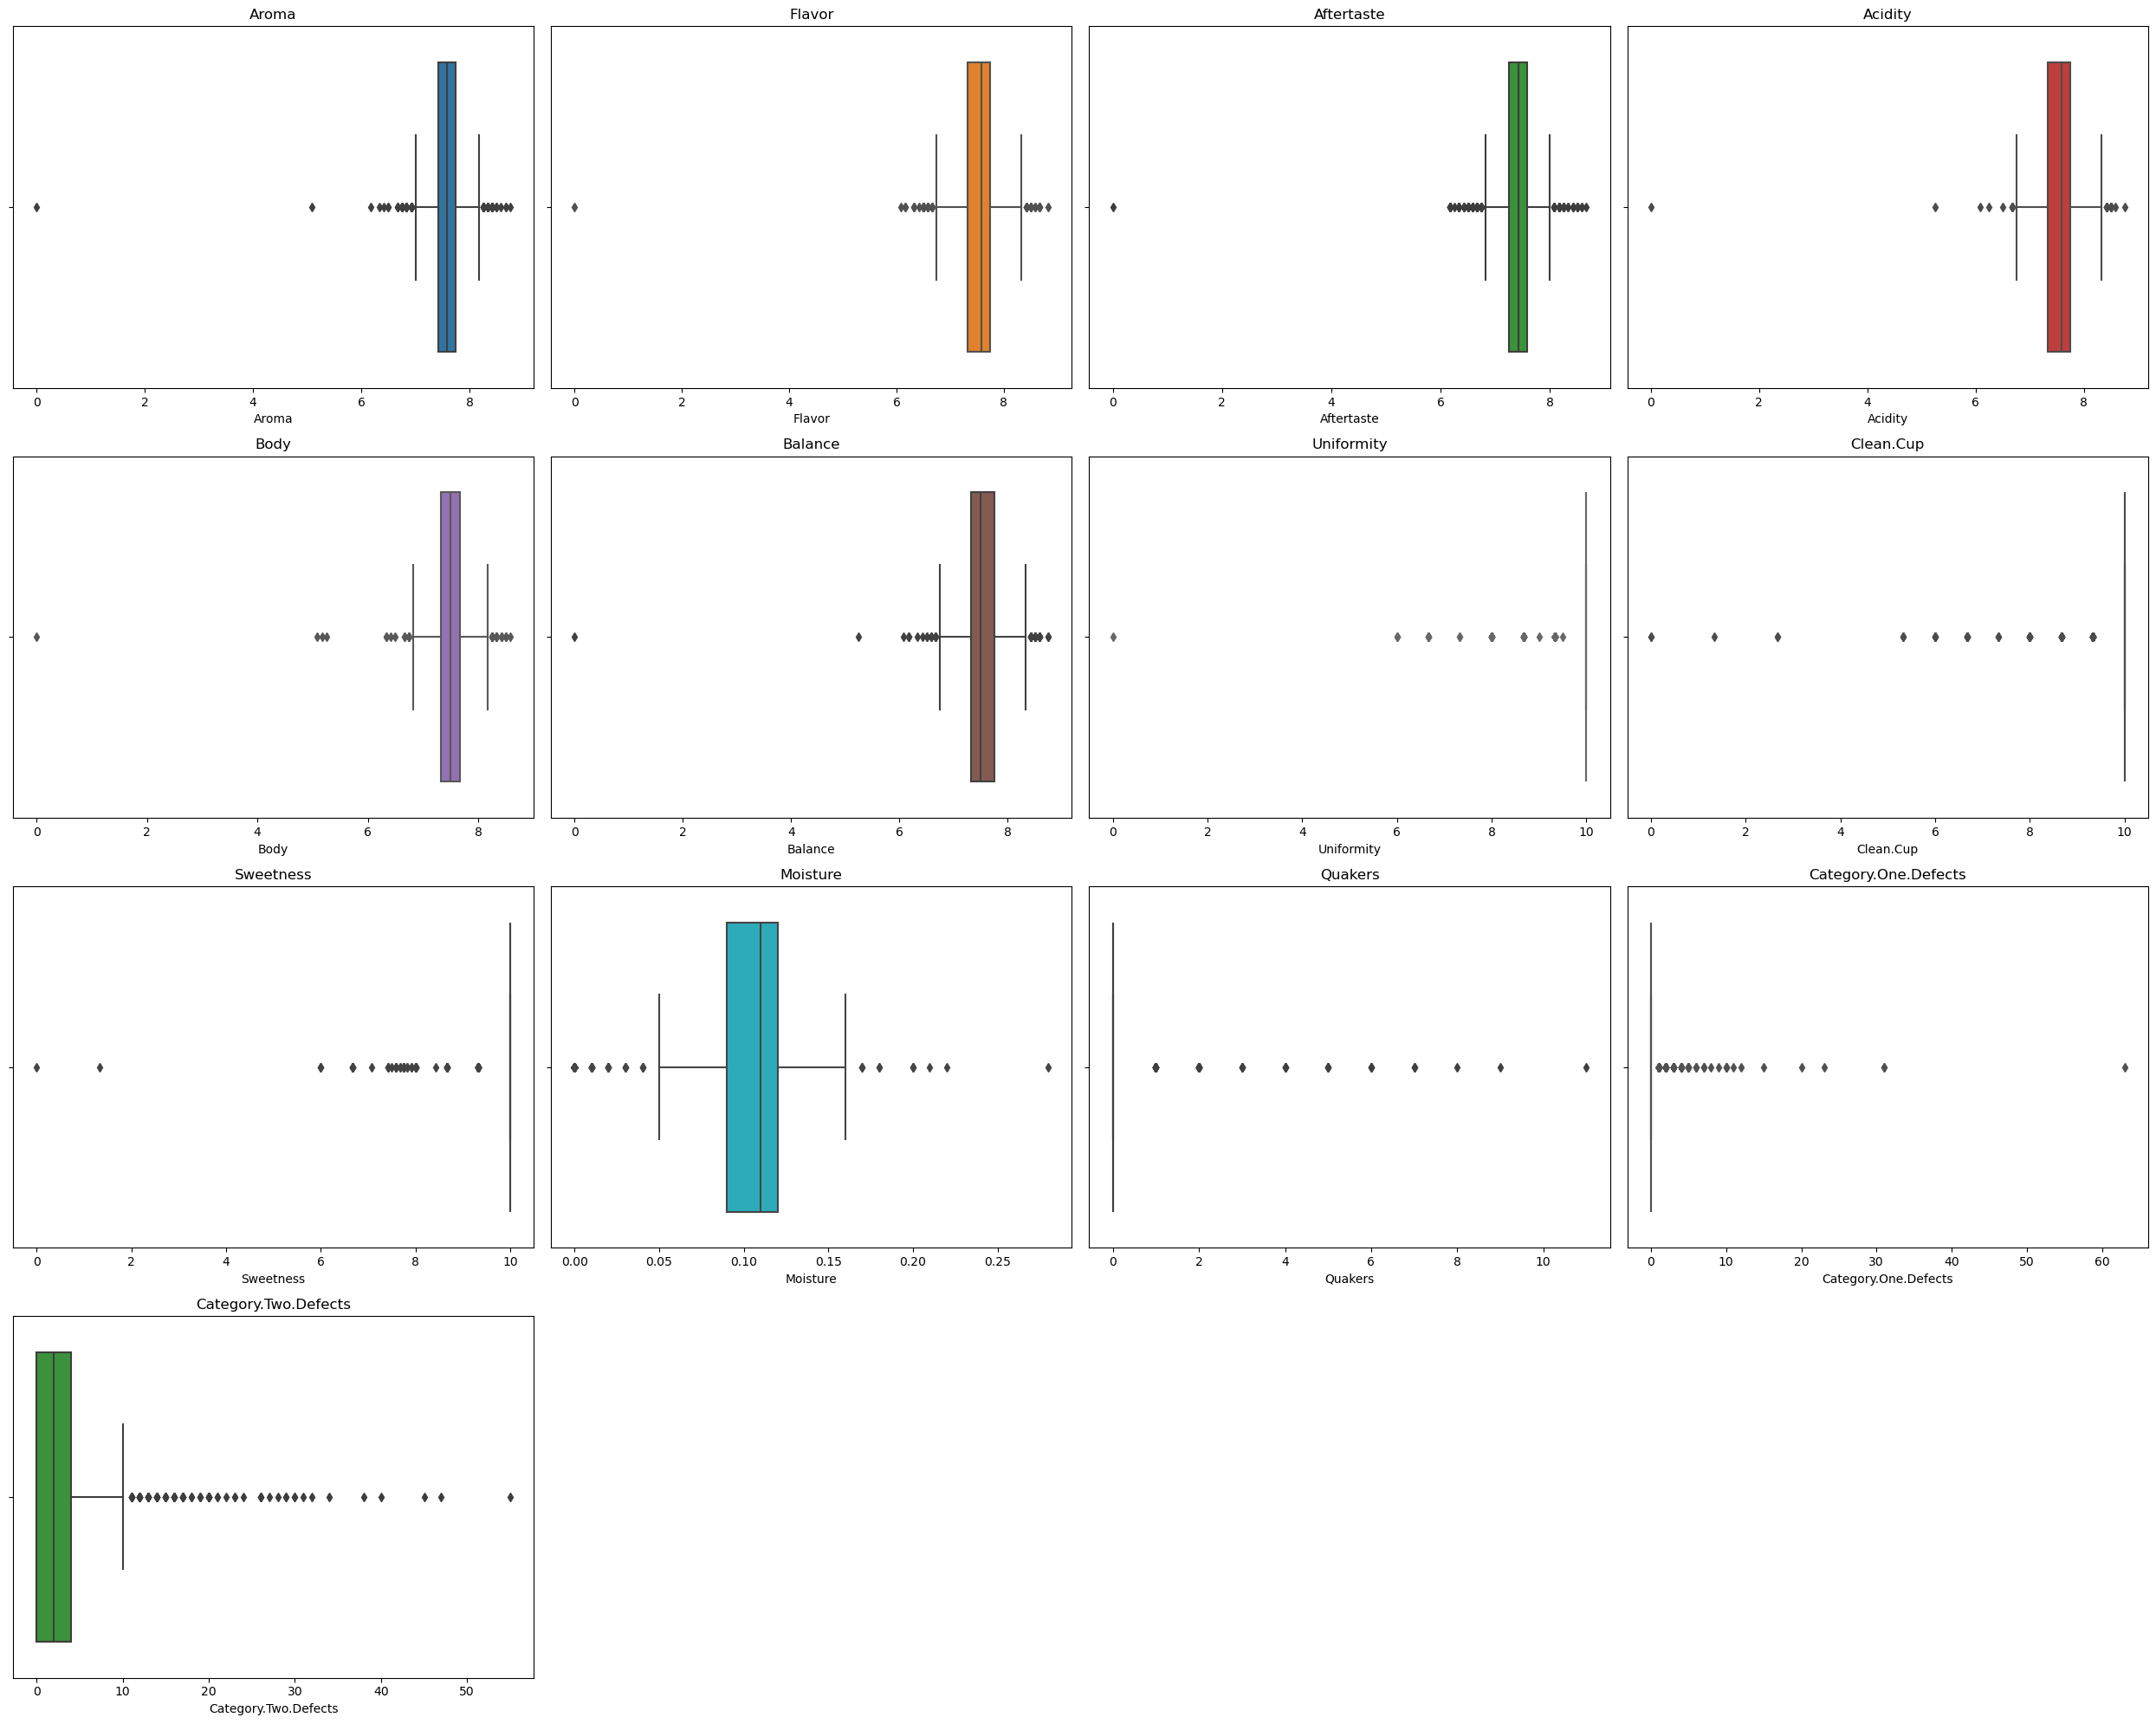

In [7]:
# Wizualizacja rozkładów atrybutów sensorycznych oraz wskazujących na defekty


kolumny = [ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects']


plt.figure(figsize=(25, 20))

# Histogramy
for i, kolumna in enumerate(kolumny):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[kolumna], kde=True, color='C{0}'.format(i % 10))
    plt.title(kolumna)

plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 20))

# Boxploty
for i, kolumna in enumerate(kolumny):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data, x=kolumna, color='C{0}'.format(i % 10))
    plt.title(kolumna)

plt.tight_layout()
plt.show()

* Zbiór danych składa się atrybutów kategorialnych oraz numerycznych. Tylko atrybuty kategorialne posiadają wartości nullowe. W tym badaniu można usunąć wszystkie atrybuty kategorialne, pozbywając się wybrakowanych wartości, ponieważ nie mają one znaczenia w przypisaniu ziaren do segmentu speciality

### 2.2. Stworzenie niezbędnych kolumn (Defects, Overall, Total_point) do nadania etykiet w kolumnie Speciality


In [8]:
# Kolumna Defects

def defects_point(row):
    if row['Moisture'] >= 0.18 or row['Quakers'] >= 5:
        return 4.0
    elif 0.14 < row['Moisture'] < 0.18 or 1 < row['Quakers'] < 5:
        return 2.0
    else:
        return 0.0

data['Defects'] = data.apply(defects_point, axis=1)

In [9]:
# Kolumna Overall

data['Overall'] = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Uniformity', 'Clean.Cup', 'Sweetness']].mean(axis=1) 

In [10]:
# Kolumna Overall

Categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Uniformity', 'Clean.Cup', 'Sweetness','Overall']

data['Total_point'] = data[Categories].sum(axis=1, min_count=1)-data['Defects']

In [11]:
data

,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,Flavor,...,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Defects,Overall,Total_point
REC_ID,,,,,,,,,,,,,,,,,,,,,
0,Arabica,Africa,Ethiopia,2014.0,04/03/16,NaN,Green,Washed / Wet,8.67,8.83,...,10.00,10.00,10.00,0.12,0,0,0,0.0,9.093333,90.933333
1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.75,8.67,...,10.00,10.00,10.00,0.12,0,0,1,0.0,9.037778,90.377778
2,Arabica,North America,Guatemala,NaN,05/31/11,Bourbon,NaN,NaN,8.42,8.50,...,10.00,10.00,10.00,0.00,0,0,0,0.0,8.945556,89.455556
3,Arabica,Africa,Ethiopia,2014.0,03/25/16,NaN,Green,Natural / Dry,8.17,8.58,...,10.00,10.00,10.00,0.11,0,0,2,0.0,8.926667,89.266667
4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.25,8.50,...,10.00,10.00,10.00,0.12,0,0,2,0.0,8.916667,89.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,South America,Ecuador,2016.0,01/18/17,NaN,Blue-Green,NaN,7.75,7.58,...,10.00,10.00,7.75,0.00,0,0,1,0.0,7.877778,78.777778
1335,Robusta,South America,Ecuador,2016.0,01/18/17,NaN,Blue-Green,NaN,7.50,7.67,...,10.00,10.00,8.42,0.00,0,0,0,0.0,7.723333,77.233333
1336,Robusta,North America,United States,2014.0,12/23/15,NaN,NaN,Natural / Dry,7.33,7.33,...,9.33,9.33,7.42,0.00,0,0,6,0.0,7.777778,77.777778


In [12]:
data.describe()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Defects,Overall,Total_point
count,1279.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,2013.567631,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,0.088379,0.173264,0.479462,3.556385,0.152353,8.287345,82.721102
std,1.808496,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.048287,0.831824,2.549683,5.312541,0.647474,0.348800,3.543799
min,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000,0.000000,0.000000,8.198889,81.755556
50%,2013.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,0.000000,2.000000,0.000000,8.333333,83.244444
75%,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,0.000000,4.000000,0.000000,8.435556,84.266667
max,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,11.000000,63.000000,55.000000,4.000000,9.093333,90.933333


* W kolumnie Total_point występuje wartość minimalna równa 0. Jest wartość odstająca do usunięcia

In [13]:
# usunięcie zera ze zbioru danych
data = data[data['Total_point'] > 0]

In [14]:
data.describe()

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Defects,Overall,Total_point
count,1278.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,2013.564945,7.572362,7.526046,7.406614,7.541338,7.523117,7.523632,9.842227,9.842459,9.864058,0.088356,0.173393,0.479821,3.557549,0.152466,8.293539,82.782926
std,1.806650,0.315916,0.341382,0.350304,0.319173,0.307815,0.353630,0.485183,0.715296,0.554207,0.048298,0.832121,2.550603,5.314357,0.647703,0.265226,2.728749
min,2009.000000,5.080000,6.080000,6.170000,5.250000,5.080000,5.250000,6.000000,0.000000,1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,5.907778,59.077778
25%,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000,0.000000,0.000000,8.202500,81.755556
50%,2013.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,0.000000,2.000000,0.000000,8.333333,83.244444
75%,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,0.000000,4.000000,0.000000,8.435556,84.266667
max,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,11.000000,63.000000,55.000000,4.000000,9.093333,90.933333


* Z ramki danych został usynięty tylko jeden wiersz

In [15]:
# Kolumna Speciality

def specialty_classification(row):
    if row['Total_point'] < 80 | row['Category.One.Defects'] != 0 | row['Category.One.Defects'] > 5:
        return 0
    else:
        return 1

data['Speciality'] = data.apply(specialty_classification, axis=1)

C:\Users\andrz\AppData\Local\Temp\ipykernel_18496\3026609467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Speciality'] = data.apply(specialty_classification, axis=1)


In [16]:
data

,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,Flavor,...,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,Defects,Overall,Total_point,Speciality
REC_ID,,,,,,,,,,,,,,,,,,,,,
0,Arabica,Africa,Ethiopia,2014.0,04/03/16,NaN,Green,Washed / Wet,8.67,8.83,...,10.00,10.00,0.12,0,0,0,0.0,9.093333,90.933333,1
1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.75,8.67,...,10.00,10.00,0.12,0,0,1,0.0,9.037778,90.377778,1
2,Arabica,North America,Guatemala,NaN,05/31/11,Bourbon,NaN,NaN,8.42,8.50,...,10.00,10.00,0.00,0,0,0,0.0,8.945556,89.455556,1
3,Arabica,Africa,Ethiopia,2014.0,03/25/16,NaN,Green,Natural / Dry,8.17,8.58,...,10.00,10.00,0.11,0,0,2,0.0,8.926667,89.266667,1
4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.25,8.50,...,10.00,10.00,0.12,0,0,2,0.0,8.916667,89.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,South America,Ecuador,2016.0,01/18/17,NaN,Blue-Green,NaN,7.75,7.58,...,10.00,7.75,0.00,0,0,1,0.0,7.877778,78.777778,1
1335,Robusta,South America,Ecuador,2016.0,01/18/17,NaN,Blue-Green,NaN,7.50,7.67,...,10.00,8.42,0.00,0,0,0,0.0,7.723333,77.233333,1
1336,Robusta,North America,United States,2014.0,12/23/15,NaN,NaN,Natural / Dry,7.33,7.33,...,9.33,7.42,0.00,0,0,6,0.0,7.777778,77.777778,1


In [17]:
# usunięcie niepotrzebynch kolumn

text_cols = ['Species', 'Continent.of.Origin', 'Country.of.Origin', 'Harvest.Year','Expiration', 'Variety', 'Color', 'Processing.Method']
data_num = data.drop(text_cols, axis=1)

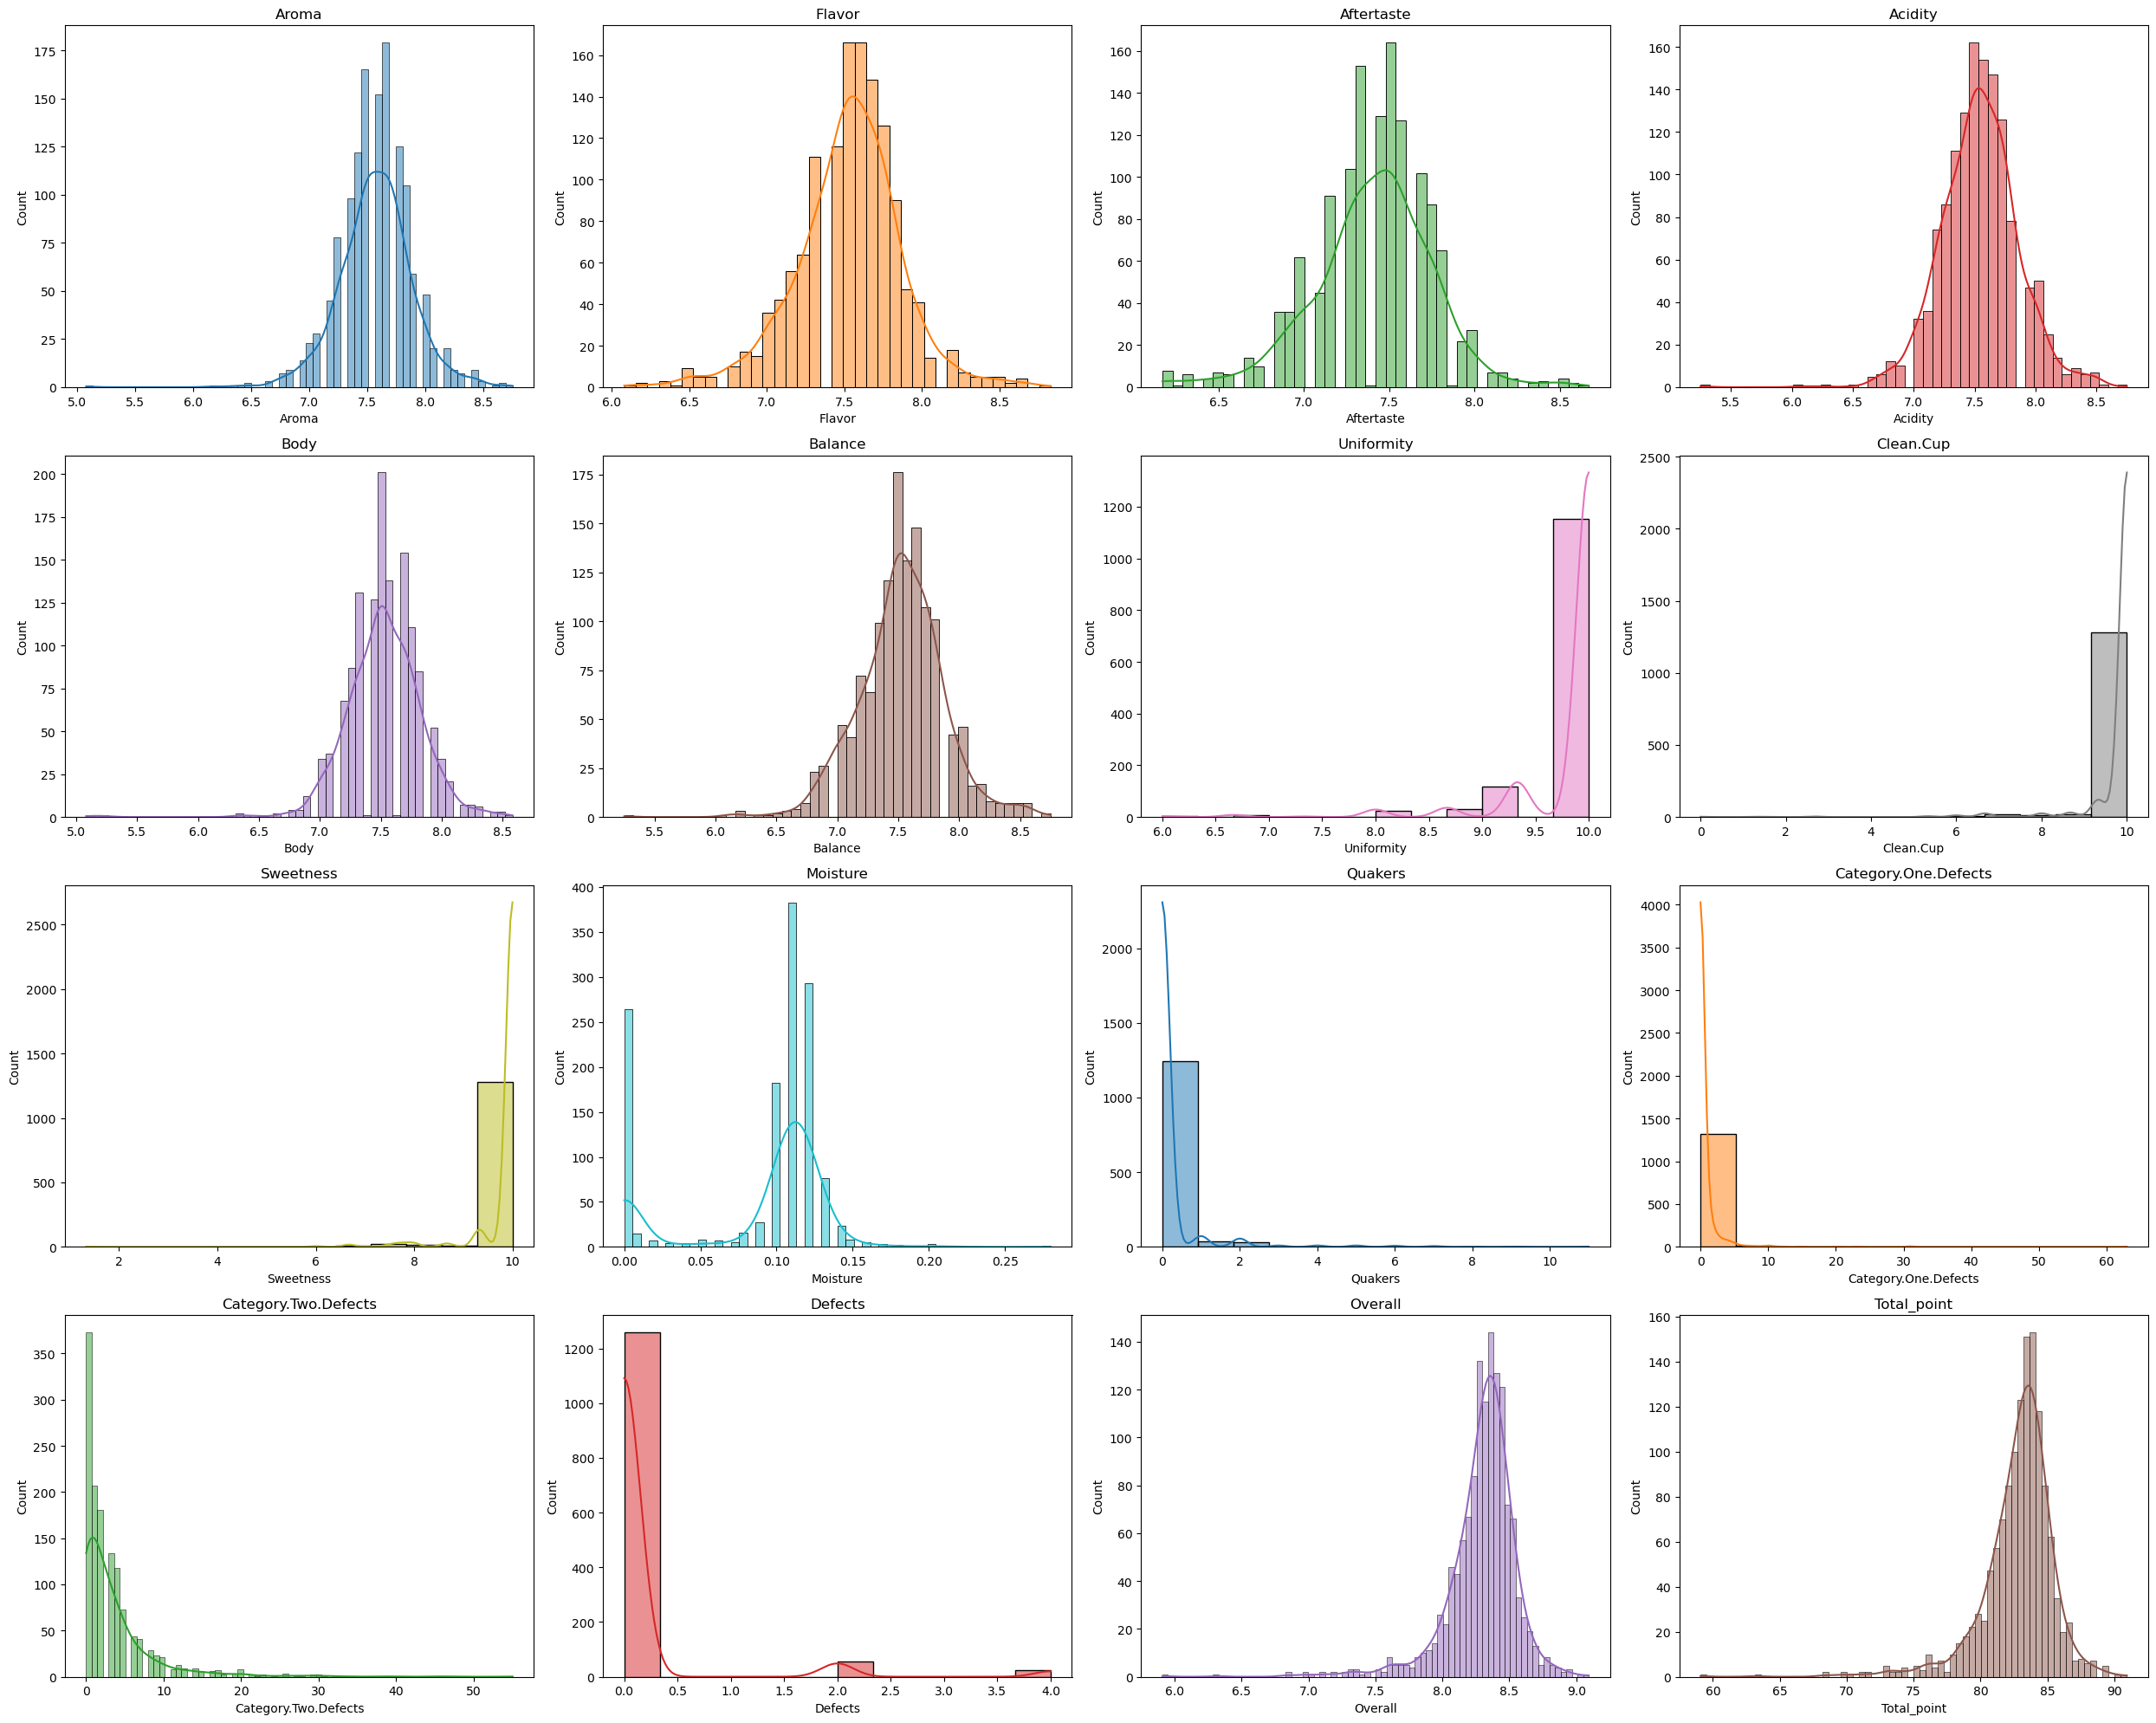

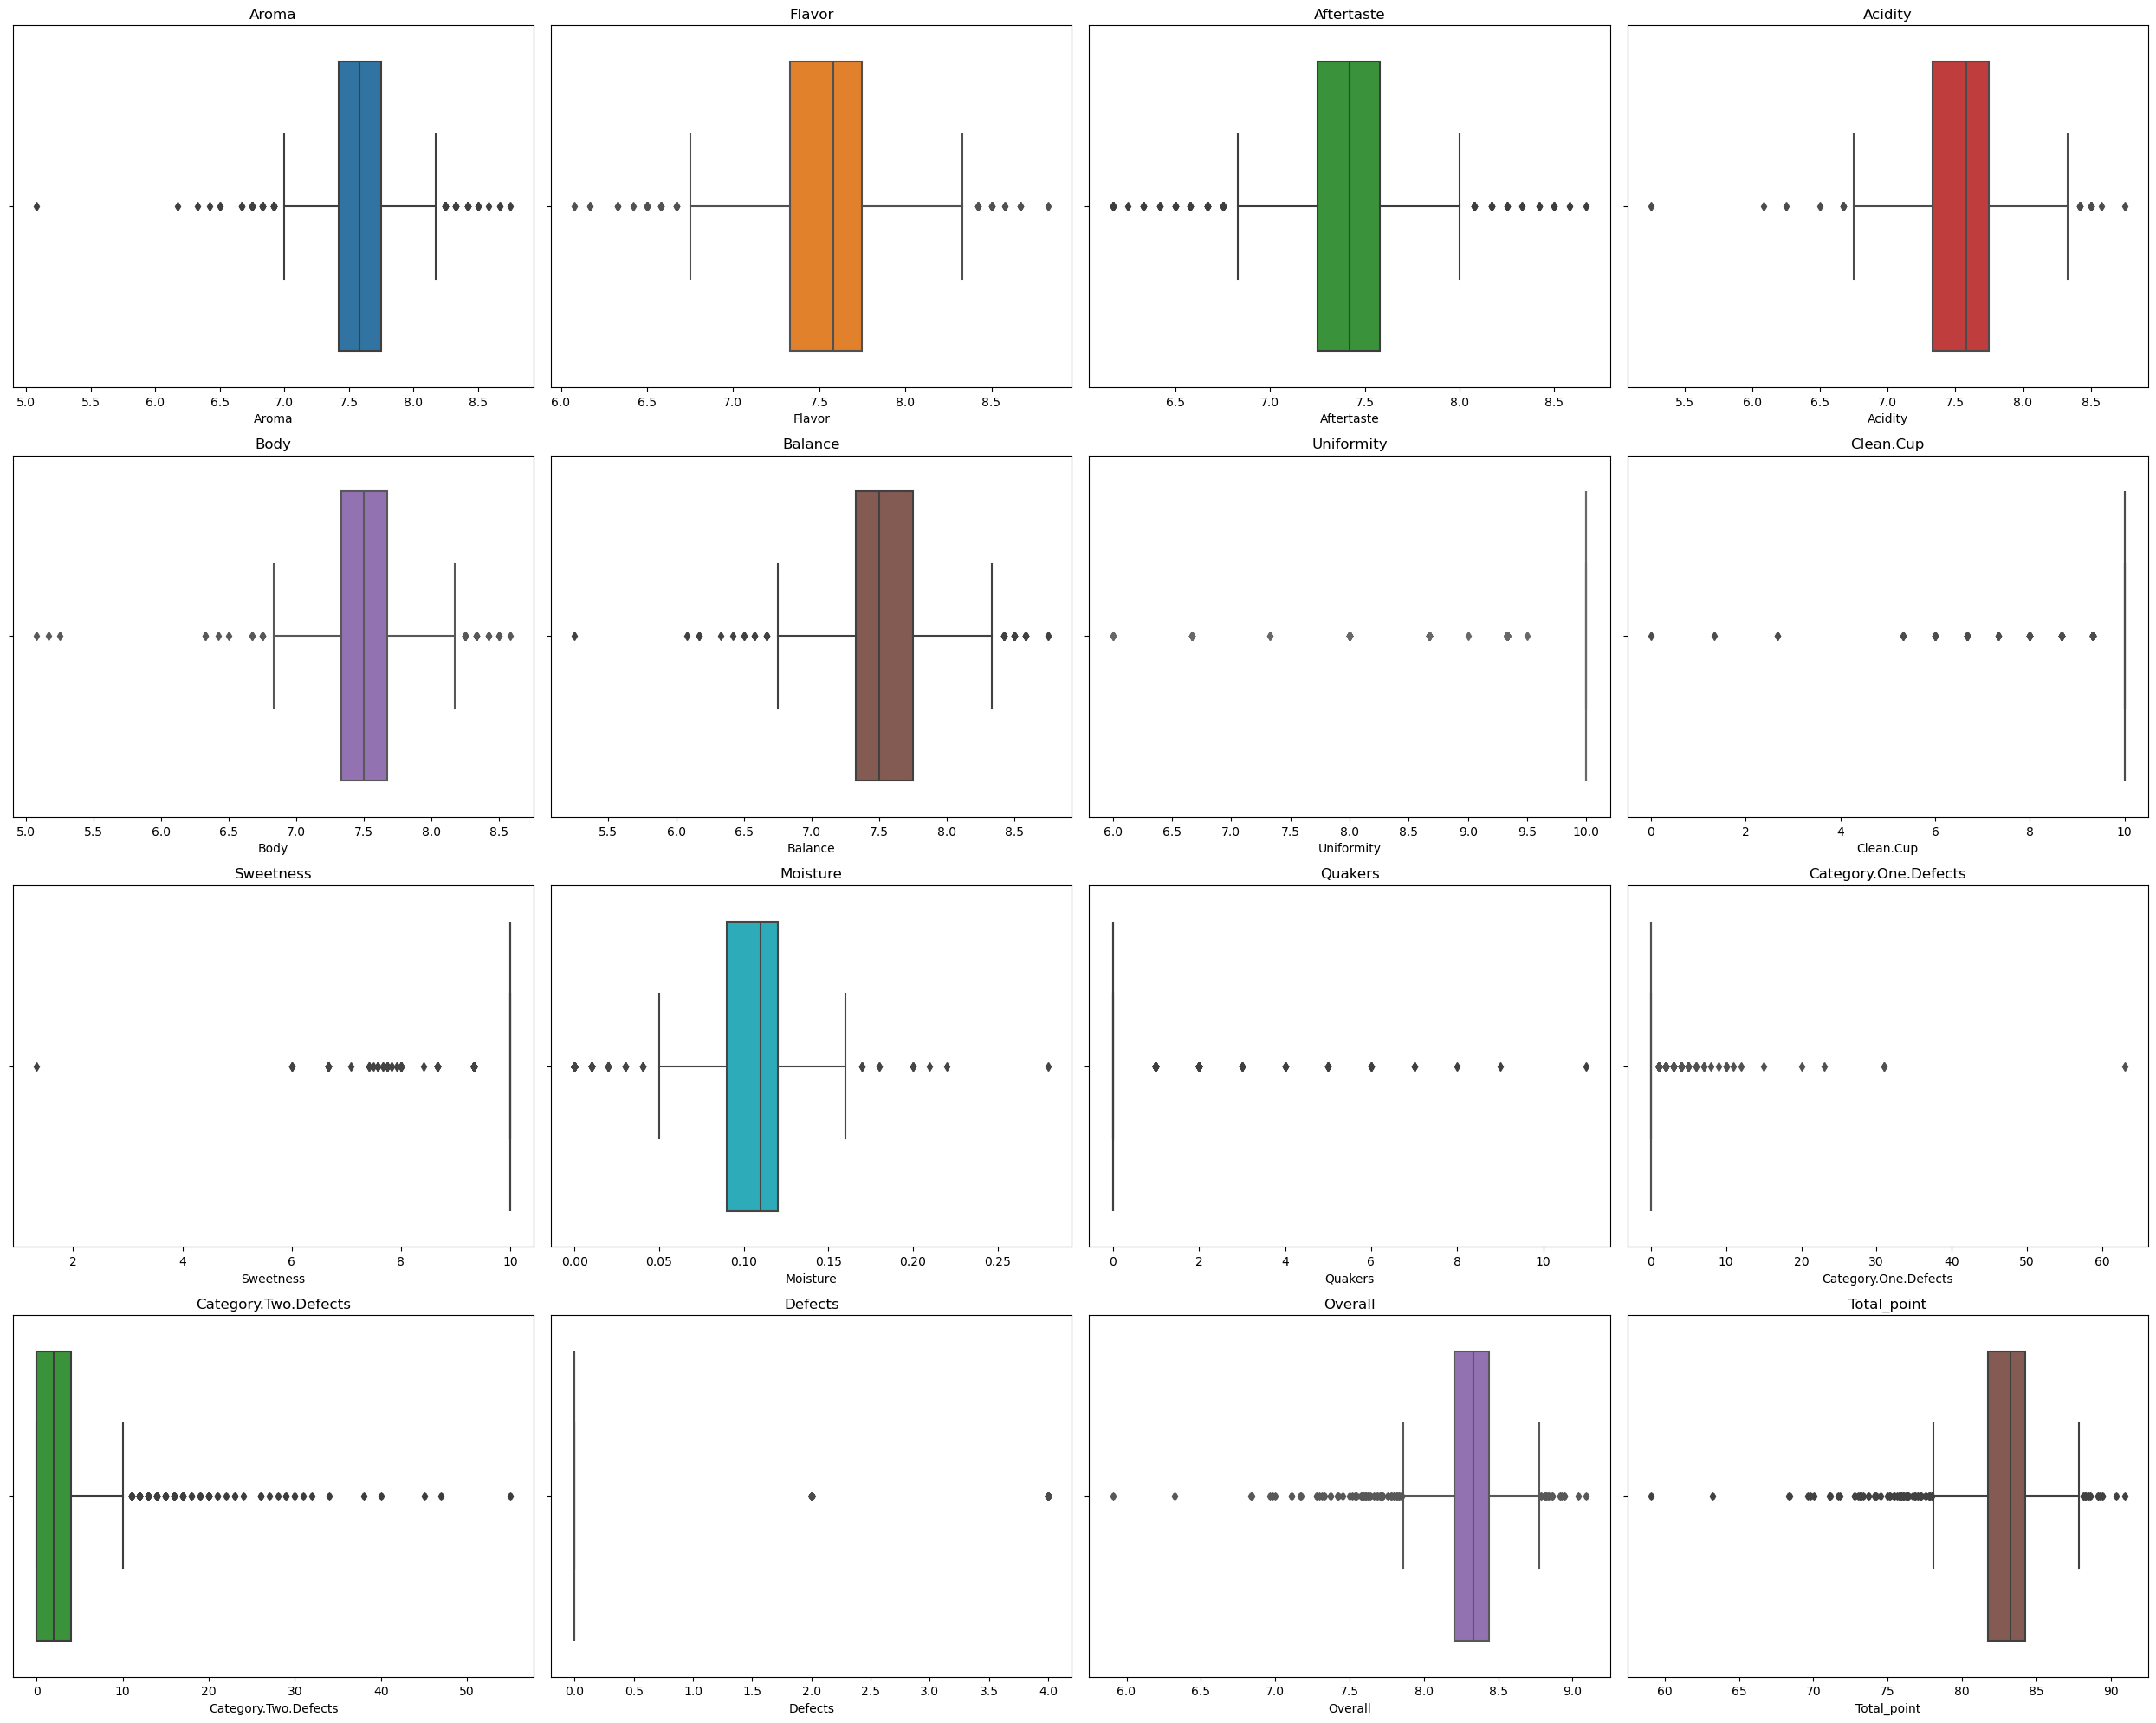

In [18]:
# Wizualizacja rozkładów atrybutów pozostawiony do procesu ML

kolumny = [ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'Defects', 'Overall', 'Total_point']


plt.figure(figsize=(25, 20))

# Histogramy
for i, kolumna in enumerate(kolumny):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data_num[kolumna], kde=True, color='C{0}'.format(i % 10))
    plt.title(kolumna)

plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 20))

# Boxploty
for i, kolumna in enumerate(kolumny):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data_num, x=kolumna, color='C{0}'.format(i % 10))
    plt.title(kolumna)

plt.tight_layout()
plt.show()

* Większość rozkładów atrybutów sensorycznych jest zbliżona do rokładu normalnego. Atrybuty mówiące o defectach nie cechują się rozkładem normalnym. Wartości odstające nie mają znamion będnych danych więc nie zostały usunięte ze zbioru.

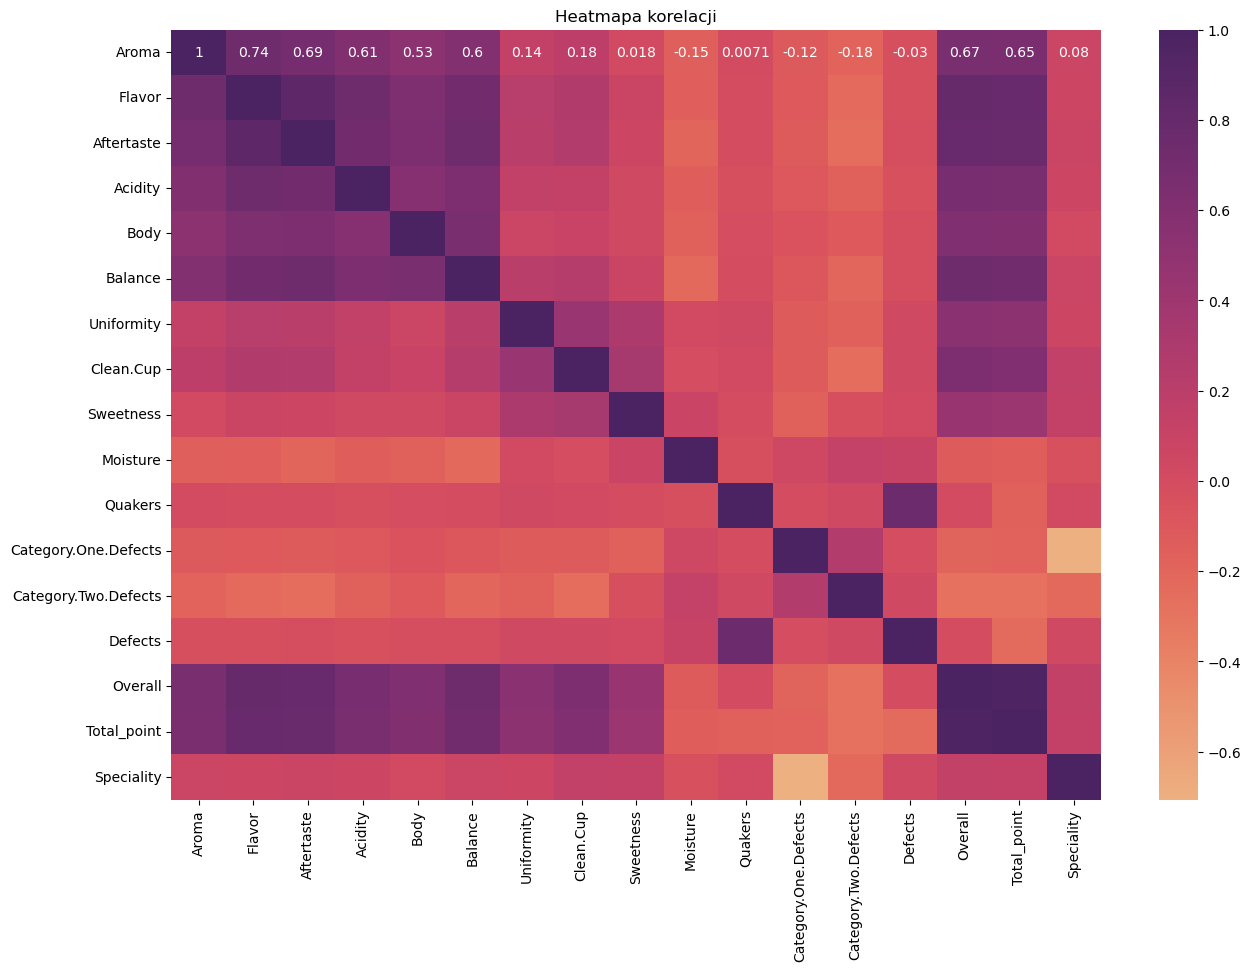

In [19]:
# Obliczamy macierz korelacji
kor = data_num.corr()

# Wykres heatmapy
plt.figure(figsize=(15, 10))
sns.heatmap(kor, annot=True, cmap=sns.color_palette("flare", as_cmap=True))
plt.title('Heatmapa korelacji')
plt.show()

* Atrybuty o podobnych rozkładach są bardziej skoralowane ze sobą.  Atrybuty mówiące o defektach nie są skorelowane z atrybutami sensorycznymi.

# 3. Podział danych

Dane podzieliłem metodą train_test_split. Dla y przypisałem kolumnę Speciality. Zbiór danych zpstał podzielony na treningowy i testowy w stosunku 80:20.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
col_class = "Speciality"
X_train, X_test, y_train, y_test = train_test_split(data_num.drop(col_class, axis=1), data_num[col_class], test_size=0.2)

In [22]:
X_train.shape, X_test.shape

((1070, 16), (268, 16))

# 4. Potok danych

W potoku danych dane zostały poddane przeskalowaniu, transformacji idopasowaniu do zbioru treningowego i testowego.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [24]:
num_values_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [25]:
preprocessing_pipeline = ColumnTransformer([
    (
        'num_attributes_steps', 
        num_values_pipeline,
        [ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'Defects', 'Overall', 'Total_point']
    )
])

In [26]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

In [27]:
X_test_preprocessed = preprocessing_pipeline.fit_transform(X_test)

# 5. Uczenie nadzorowane - Klasyfikacja

Do uczenia maszynowego na zbiorze treningowy wybrałem algorytmy KNN, Drzewa decyzyjnego oraz regresji logistycznej 

## 5.1. KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
model = KNeighborsClassifier(n_neighbors=5)

In [30]:
model.fit(X_train_preprocessed, y_train)

KNeighborsClassifier()

In [31]:
y_pred = model.predict(X_test_preprocessed)

In [32]:
# przeliczanie dokładności zbalansowanej

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

In [33]:
# macierz pomyłek 
confusion_matrix(y_test, y_pred) 

# przeliczanie miar
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)
f'Balanced_accuracy: {balanced_accuracy}, precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Balanced_accuracy: 0.9981132075471698, precision: 1.0, sensitivity: 0.9962264150943396, specificity: 1.0, accuracy 0.996268656716418'

## 5.2. Drzewo decyzyjne

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model.predict(X_test_preprocessed)

In [37]:
# przeliczanie dokładności zbalansowanej

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

In [38]:
# macierz pomyłek 
confusion_matrix(y_test, y_pred) 

# przeliczanie miar
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)
f'Balanced_accuracy: {balanced_accuracy}, precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Balanced_accuracy: 0.9886792452830189, precision: 1.0, sensitivity: 0.9773584905660377, specificity: 1.0, accuracy 0.9776119402985075'

## 5.3. Regresja logistyczna

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_preprocessed, y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_pred = model.predict(X_test_preprocessed)

In [42]:
# przeliczanie dokładności zbalansowanej

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

In [43]:
# macierz pomyłek 
confusion_matrix(y_test, y_pred) 

# przeliczanie miar
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)
f'Balanced_accuracy: {balanced_accuracy}, precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Balanced_accuracy: 0.9905660377358491, precision: 1.0, sensitivity: 0.9811320754716981, specificity: 1.0, accuracy 0.9813432835820896'

# 6. Dyskusja wyników

Do sprawdzenia jak modele poradziły sobie z klasyfikacją danych w zbiorze testowym wykorzystałem miary:
- balanced_accuracy - dokładność zbalansowana
- precision - precyzja
- sensitivity - czułość
- specificity - specyficzność
- global_accuracy - dokładność globalna

Otrzymane wyniki:

KNN
- precision: 1.0
- sensitivity: 0.9962264150943396
- specificity: 1.0
- global_accuracy 0.996268656716418
- balanced_accuracy: 0.9981132075471698

Drzewo decyzyjne
- precision: 1.0
- sensitivity: 0.9773584905660377
- specificity: 1.0
- global_accuracy 0.9776119402985075
- balanced_accuracy: 0.9886792452830189

Regresja logistyczna
- precision: 1.0
- sensitivity: 0.9811320754716981
- specificity: 1.0
- global_accuracy 0.9813432835820896
- balanced_accuracy: 0.9905660377358491

Wszystkie modele bardzo dobrze poradziły sobie z klasyfikacją danych i osiągnęły bardzo wysokie wyniki miar jakości klasyfikacji. Różnice są minimale, najlepiej poradził sobie model KNN, następnie Regresji logistycznej a model Drzewa decyzyjnego usyskał najniższy wynik.